In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
true = pd.read_csv('True.csv',index_col=0)

In [3]:
true

,text,subject,date
title,,,
"As U.S. budget fight looms, Republicans flip their fiscal script",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
U.S. military to accept transgender recruits on Monday: Pentagon,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
Senior U.S. Republican senator: 'Let Mr. Mueller do his job',WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
FBI Russia probe helped by Australian diplomat tip-off: NYT,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
Trump wants Postal Service to charge 'much more' for Amazon shipments,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...
'Fully committed' NATO backs new U.S. approach on Afghanistan,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
LexisNexis withdrew two products from Chinese market,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"


In [4]:
fake = pd.read_csv('Fake.csv',index_col=0)

In [5]:
fake

,text,subject,date
title,,,
Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
Drunk Bragging Trump Staffer Started Russian Collusion Investigation,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
Sheriff David Clarke Becomes An Internet Joke For Threatening To Poke People ‘In The Eye’,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
Trump Is So Obsessed He Even Has Obama’s Name Coded Into His Website (IMAGES),"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
Pope Francis Just Called Out Donald Trump During His Christmas Speech,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...
McPain: John McCain Furious That Iran Treated US Sailors Well,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
"JUSTICE? Yahoo Settles E-mail Privacy Class-action: $4M for Lawyers, $0 for Users",21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
Sunnistan: US and Allied ‘Safe Zone’ Plan to Take Territorial Booty in Northern Syria,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"


In [6]:
true['label'] = 1
fake['label'] = 0

In [7]:
real = pd.concat([true,fake],ignore_index=True)

In [8]:
real

,text,subject,date,label
0,WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...
44893,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44894,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44895,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44896,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [9]:
real = real.sample(frac=1,random_state=42).reset_index(drop=True)

In [10]:
real

,text,subject,date,label
0,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",0
1,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",0
2,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",0
3,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",1
4,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",0
...,...,...,...,...
44893,ABUJA (Reuters) - The United States has formal...,worldnews,"December 27, 2017",1
44894,Tune in to the Alternate Current Radio Network...,Middle-east,"June 29, 2016",0
44895,I m convinced the Freedom From Religion group...,Government News,"Feb 27, 2016",0
44896,WASHINGTON (Reuters) - The Republican tax plan...,politicsNews,"November 2, 2017",1


In [11]:
print(real.columns)

Index(['text', 'subject', 'date', 'label'], dtype='object')


In [12]:
Real = real.copy()

In [13]:
Real['Content'] = Real['text'] + ' ' + Real['subject']

In [14]:
Real

,text,subject,date,label,Content
0,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",0,"Donald Trump s White House is in chaos, and th..."
1,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",0,Now that Donald Trump is the presumptive GOP n...
2,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",0,Mike Pence is a huge homophobe. He supports ex...
3,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",1,SAN FRANCISCO (Reuters) - California Attorney ...
4,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",0,Twisted reasoning is all that comes from Pelos...
...,...,...,...,...,...
44893,ABUJA (Reuters) - The United States has formal...,worldnews,"December 27, 2017",1,ABUJA (Reuters) - The United States has formal...
44894,Tune in to the Alternate Current Radio Network...,Middle-east,"June 29, 2016",0,Tune in to the Alternate Current Radio Network...
44895,I m convinced the Freedom From Religion group...,Government News,"Feb 27, 2016",0,I m convinced the Freedom From Religion group...
44896,WASHINGTON (Reuters) - The Republican tax plan...,politicsNews,"November 2, 2017",1,WASHINGTON (Reuters) - The Republican tax plan...


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
tfidf = TfidfVectorizer(stop_words='english',max_df=0.7)
X = tfidf.fit_transform(Real['Content'].values.astype('U'))

In [17]:
X.shape

(44898, 121692)

In [18]:
y = Real['label']

In [19]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6893674 stored elements and shape (44898, 121692)>

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
confusion = confusion_matrix(y_test,y_pred)

In [22]:
accuracy,confusion

(0.9906458797327394,
 array([[4616,   53],
        [  31, 4280]]))

<Axes: >

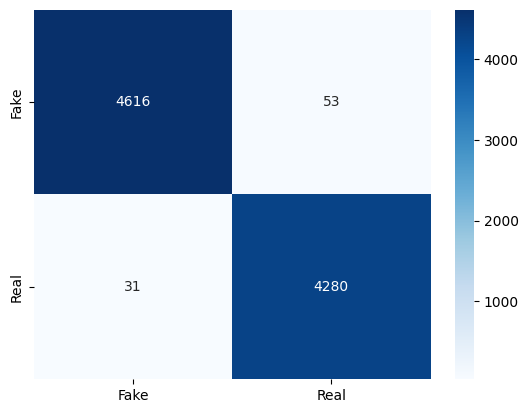

In [23]:
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])

In [24]:
import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)
with open("tfidf.pkl", "wb") as f:
    pickle.dump(tfidf, f)